In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import libraries
import requests
import time
from datetime import datetime
#Import API key
from config import weather_api_key
# URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Set of random latitude and longitude combinations
lats = np.random.uniform(90,-90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add Latitude and Longitude tuple in ZIP to a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | barbar
City not found. Skipping...
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | shieli
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | litoral del san juan
City not found. Skipping...
Processing Record 13 of Set 1 | bongandanga
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | hovd
Processing Record 20 of Set 1 | port alfred
Processing Record

In [7]:
# Length of the df
len(city_data)


560

In [8]:
# Convert the array of dictionaries to a Pandas DF

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,77.25,88,40,11.50,MU,2022-05-07 17:11:57
1,Mataura,-46.1927,168.8643,58.48,88,84,4.94,NZ,2022-05-07 17:11:57
2,Mar Del Plata,-38.0023,-57.5575,73.42,53,0,23.02,AR,2022-05-07 17:07:35
3,Shieli,44.1667,66.7500,78.40,32,61,15.99,KZ,2022-05-07 17:11:58
4,Ushuaia,-54.8000,-68.3000,55.06,47,20,16.11,AR,2022-05-07 17:08:59
5,Castro,-24.7911,-50.0119,65.80,46,39,5.03,BR,2022-05-07 17:11:59
6,Thompson,55.7435,-97.8558,55.80,89,68,10.11,CA,2022-05-07 17:12:00
7,Chokurdakh,70.6333,147.9167,16.52,94,99,11.56,RU,2022-05-07 17:12:00
8,Carnarvon,-24.8667,113.6333,64.47,77,40,6.91,AU,2022-05-07 17:12:01
9,East London,-33.0153,27.9116,65.37,87,98,11.43,ZA,2022-05-07 17:12:01


In [9]:
#Re order columns
new_col_order= ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_col_order]
city_data_df.head(2)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2022-05-07 17:11:57,-20.4081,57.7000,77.25,88,40,11.50
1,Mataura,NZ,2022-05-07 17:11:57,-46.1927,168.8643,58.48,88,84,4.94


In [10]:
#Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'

# Export city data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DF for plotting

lat = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

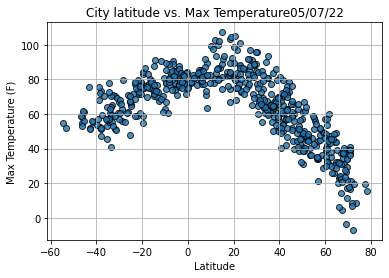

In [18]:
# Import time module
import time
#Scatter plot for latitude vs max temperature

plt.scatter(lat, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

#Other graph properties
plt.title(f"City latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Max_temp.png")

#Show plot
plt.show()

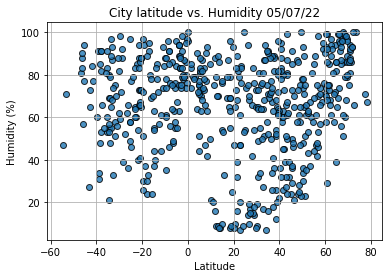

In [19]:
#Scatter plot for latitude vs max temperature

plt.scatter(lat, humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

#Other graph properties
plt.title(f"City latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Humidity.png")

#Show plot
plt.show()

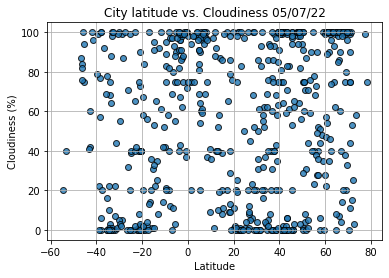

In [20]:
#Scatter plot for latitude vs max temperature

plt.scatter(lat, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

#Other graph properties
plt.title(f"City latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Cloudiness.png")

#Show plot
plt.show()

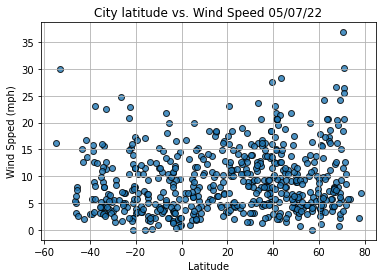

In [21]:
#Scatter plot for latitude vs max temperature

plt.scatter(lat, wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

#Other graph properties
plt.title(f"City latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel('Wind Spped (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Wind_speed.png")

#Show plot
plt.show()

In [22]:
#Import linregress
from scipy.stats import linregress 
# Function to create linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    #Scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color = "red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# Norther and Southern Hemisphere DF
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

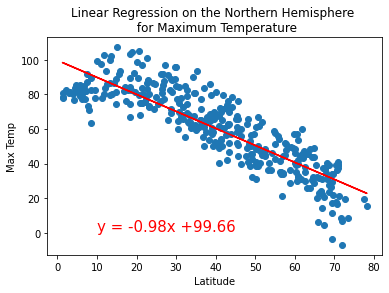

In [61]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Call function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,1))

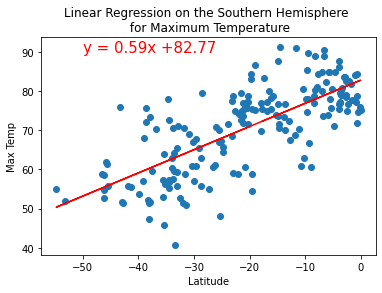

In [62]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Call function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,90))

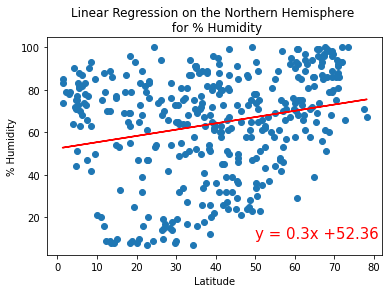

In [65]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Call function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (50,10))

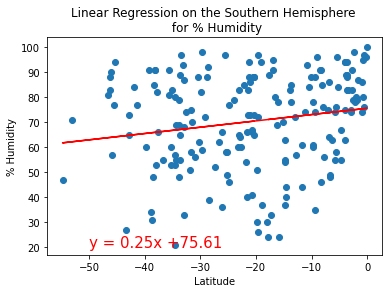

In [66]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Call function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-50,20))

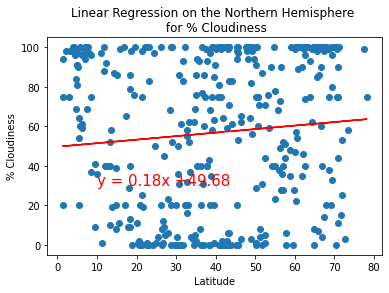

In [69]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Call function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (10,30))

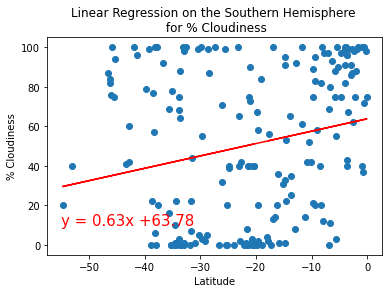

In [73]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Call function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-55,10))

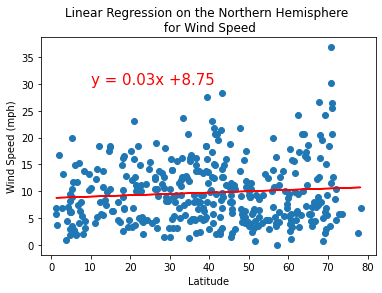

In [78]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Call function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (10,30))

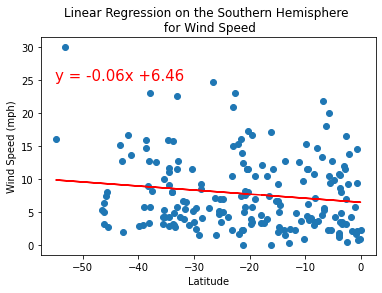

In [79]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Call function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (-55,25))